# Scrapping Table

https://www.worldometers.info/coronavirus/

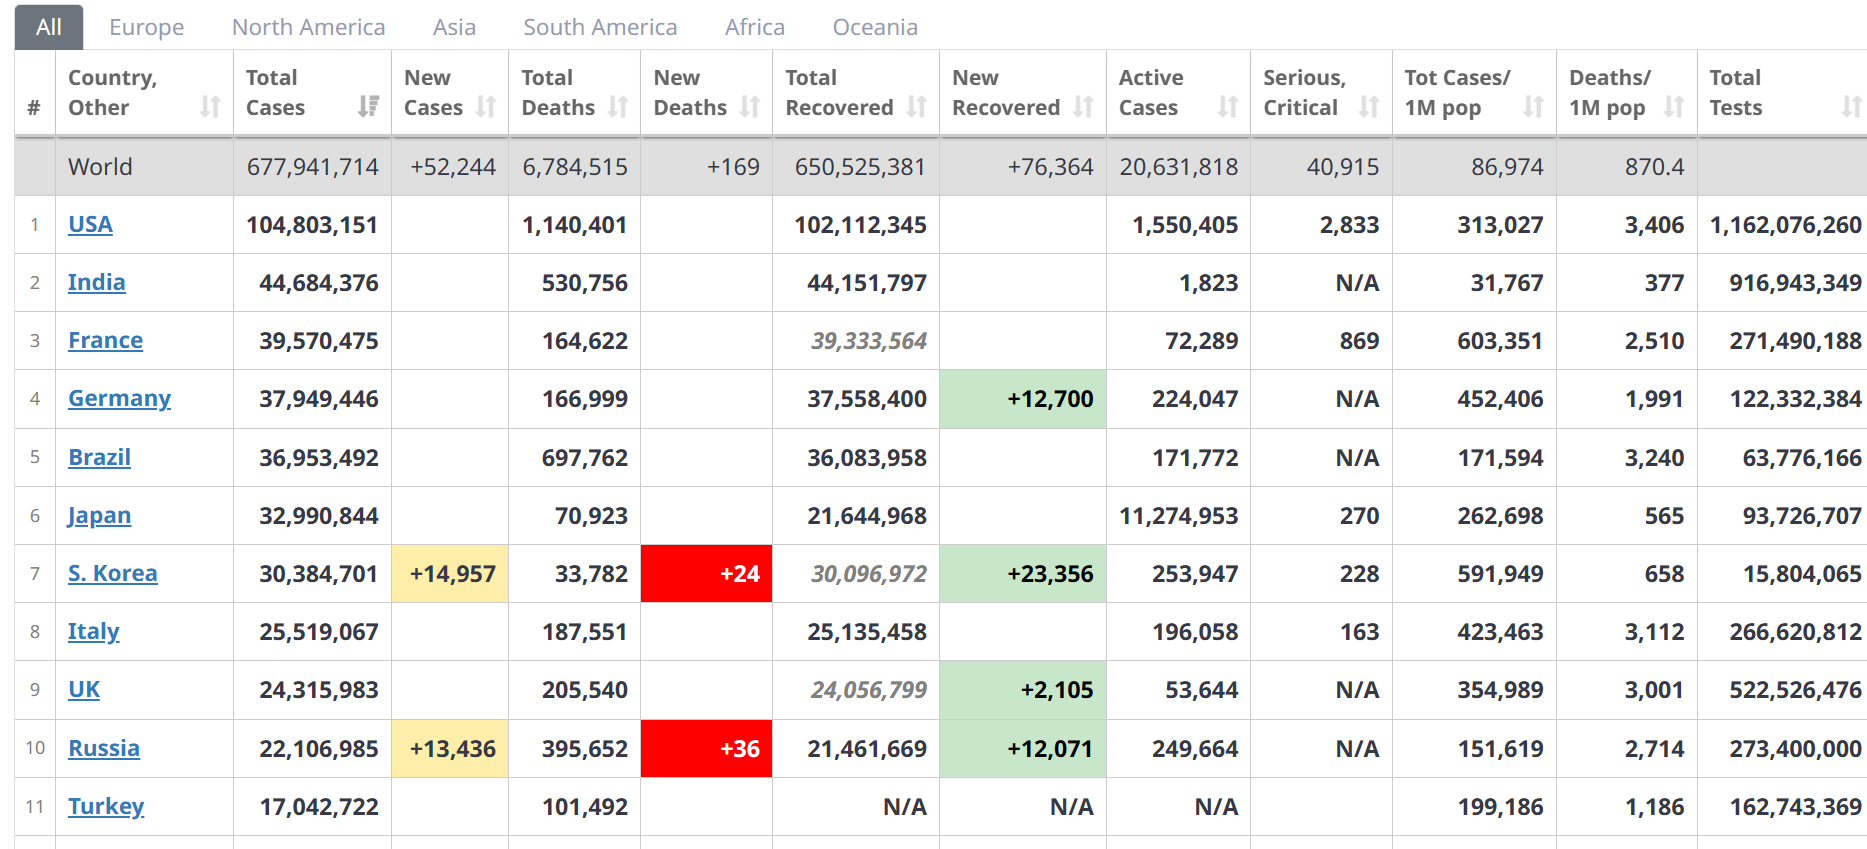

## Everyone must read this article

https://medium.com/analytics-vidhya/how-to-scrape-a-table-from-website-using-python-ce90d0cfb607

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Create an URL object
url = 'https://www.worldometers.info/coronavirus/'
# Create object page
page = requests.get(url)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" siz
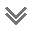

In [3]:
# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')
soup

In [4]:
# Obtain information from tag <table>
table1 = soup.find('table', id='main_table_countries_today')
table1

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [5]:
# Obtain every title of columns with tag <th>
headers = []
for i in table1.find_all('th'):
    title = i.text
    headers.append(title)

In [6]:
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [7]:
headers[13]

'Tests/\n1M pop\n'

In [8]:
# Convert wrapped text in column 13 into one line text
headers[13] = 'Tests/1M pop'

In [9]:
# Create a dataframe
mydata = pd.DataFrame(columns = headers)

In [10]:
# Create a for loop to fill mydata
for j in table1.find_all('tr')[1:]:
    
    row_data = j.find_all('td')
    
    row = []
    
    for i in row_data:
        row.append(i.text)

    length = len(mydata)
    mydata.loc[length] = row

In [11]:
# Drop and clearing unnecessary rows
mydata.drop(mydata.index[0:7], inplace=True)
mydata.drop(mydata.index[222:229], inplace=True)
mydata.reset_index(inplace=True, drop=True)

# Drop “#” column
mydata.drop('#', inplace=True, axis=1)

In [12]:
# Export to csv
mydata.to_csv('covid_data.csv', index=False)

# Try to read csv
mydata2 = pd.read_csv('covid_data.csv')

In [14]:
mydata2

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,"679,192,004","+43,431","6,794,496",126.0,"651,994,710","+88,160","20,402,798","40,449","87,134",...,NaN,NaN,NaN,All,\n,NaN,NaN,NaN,NaN,NaN
1,USA,"105,092,404",NaN,"1,143,760",NaN,"102,472,268",NaN,"1,476,376","2,436","313,891",...,"1,163,606,545","3,475,473","334,805,269",North America,3,293,0.0,NaN,NaN,"4,410"
2,India,"44,685,450",NaN,"530,763",NaN,"44,152,687",NaN,"2,000",NaN,"31,768",...,"918,101,478","652,695","1,406,631,776",Asia,31,"2,650",2.0,NaN,NaN,1
3,France,"39,600,548",NaN,"164,829",NaN,"39,368,009",NaN,"67,710",869,"603,809",...,"271,490,188","4,139,547","65,584,518",Europe,2,398,0.0,NaN,NaN,"1,032"
4,Germany,"38,068,912",NaN,"167,604",NaN,"37,643,100","+12,300","258,208",NaN,"453,830",...,"122,332,384","1,458,359","83,883,596",Europe,2,500,1.0,NaN,NaN,"3,078"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Total:,"67,936,779",+100,"1,349,747",13.0,"66,186,164",+627,"400,868","10,196",NaN,...,NaN,NaN,NaN,South America,,NaN,NaN,NaN,NaN,NaN
229,Total:,"13,968,528",NaN,"25,968",NaN,"13,823,069",NaN,"119,491",71,NaN,...,NaN,NaN,NaN,Australia/Oceania,,NaN,NaN,NaN,NaN,NaN
230,Total:,"12,790,732",NaN,"258,576",NaN,"12,074,402",NaN,"457,754",547,NaN,...,NaN,NaN,NaN,Africa,,NaN,NaN,NaN,NaN,NaN
231,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
